In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [96]:
data = pd.read_csv("TCS_stock_history.csv")
data['Data'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Data
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,2002-08-12
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,2002-08-13
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,2002-08-14
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,2002-08-15
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,2002-08-16


In [98]:
print(data.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Data            0
dtype: int64


In [100]:
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

In [102]:
data.ffill(inplace=True)

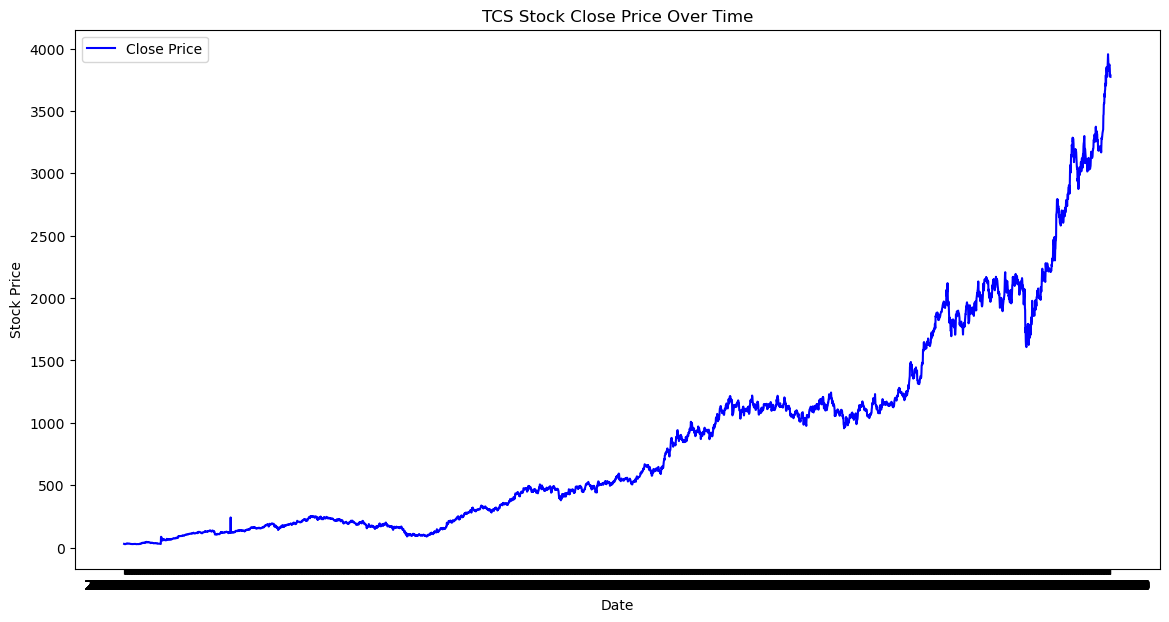

In [104]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue',
label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()

In [106]:
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

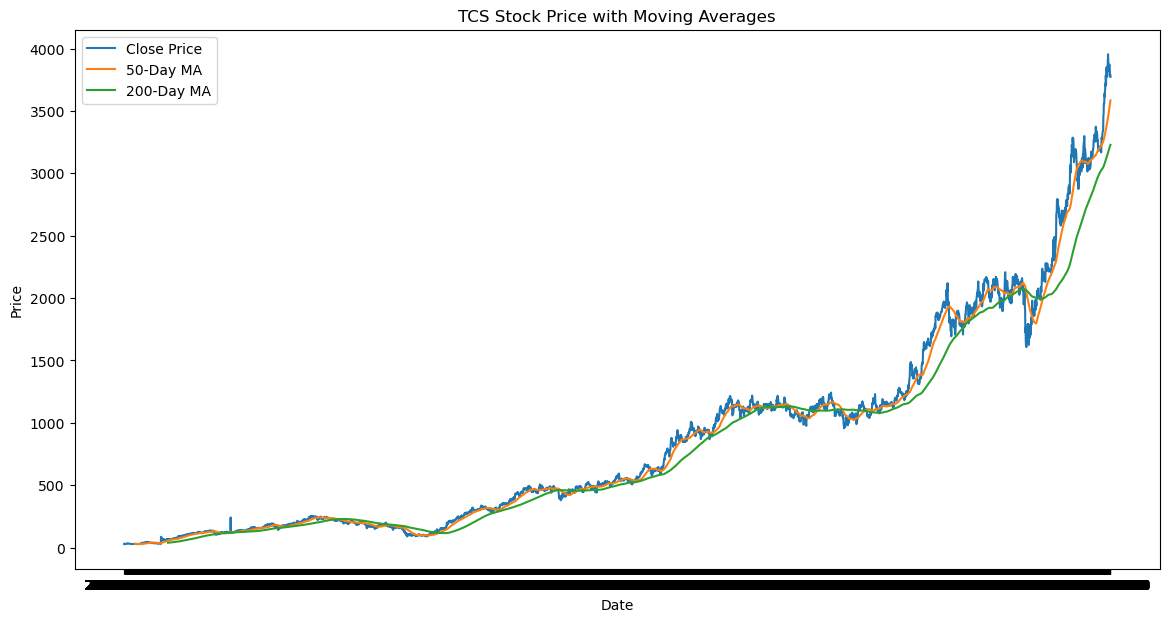

In [108]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA50'], label='50-Day MA')
plt.plot(data['Date'], data['MA200'], label='200-Day MA')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()

In [112]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek

In [114]:
print(data['Date'].head())
print(data['Date'].dtype)

0   2002-08-12
1   2002-08-13
2   2002-08-14
3   2002-08-15
4   2002-08-16
Name: Date, dtype: datetime64[ns]
datetime64[ns]


In [116]:
data['Prev_Close'] = data['Close'].shift(1)
data.dropna(inplace=True)

In [118]:
X = data[['Open', 'High', 'Low', 'Volume', 'Prev_Close',
'Day_of_Week', 'Month']]
y = data['Close']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [122]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
y_pred = model.predict(X_test)

In [126]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 39.049929985213716


In [128]:
print("R-Squared Score:", r2_score(y_test, y_pred))

R-Squared Score: 0.9999438356582193


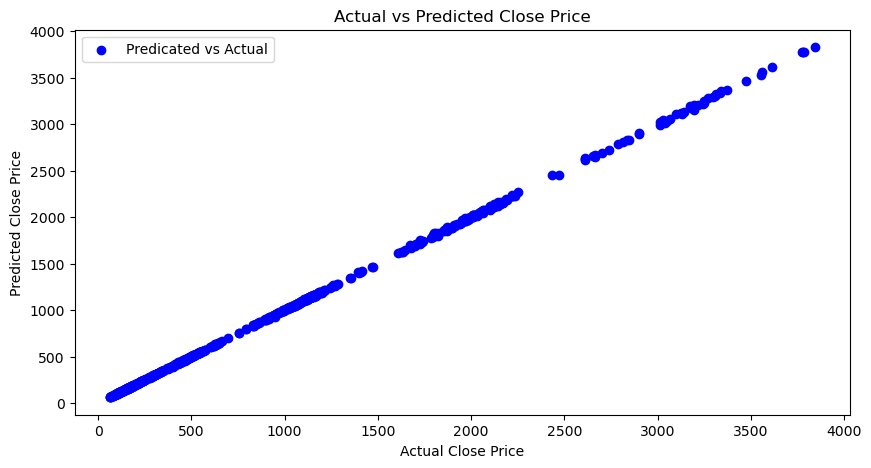

In [130]:
plt.figure(figsize= (10, 5))
plt.scatter(y_test, y_pred, color='Blue', label='Predicated vs Actual')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()


In [152]:
import pickle
with open('TCS_Stock_Predictor.pkl', 'wb') as file:
    pickle.dump(model, file)

In [166]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
%pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


Note: you may need to restart the kernel to use updated packages.


In [168]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=30, batch_size=64)

# Make predictions
lstm_predictions = model.predict(X_test)

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0081
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 1.3286e-04
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.1691e-04
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 1.2347e-04
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 1.2462e-04
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - loss: 1.1615e-04
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 1.0708e-04
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 1.1035e-04
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 1.0673e-04
Epoch 10/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 1.0215e-04
Epoch 11/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - loss: 1.1969e-04
Epoch 12/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - loss: 1.1551e-04
Epoch 13/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 1.0046e-04
Epoch 14/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - loss: 1.0938e-04
Epoc

In [176]:
from sklearn.metrics import mean_absolute_error
# Inverse transform the predictions
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Evaluate the model
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 3453930.358484243
